In [1]:
!pip install pandas matplotlib statsmodels


In [3]:
import pandas as pd

data = pd.read_csv("stock_data.csv", skiprows=2)
print(data.columns)
data.head()


Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,02-01-2020,72.468246,72.528566,71.223244,71.476585,135480400
1,03-01-2020,71.763725,72.523754,71.539337,71.696167,146322800
2,06-01-2020,72.335548,72.374154,70.634532,70.885464,118387200
3,07-01-2020,71.995369,72.600975,71.775804,72.345220,108872000
4,08-01-2020,73.153496,73.455095,71.698581,71.698581,132079200


In [5]:
import pandas as pd

# Read CSV without assuming anything
data = pd.read_csv("stock_data.csv")

# Show column names clearly
for col in data.columns:
    print(f"'{col}'")

data.head()


'Price'
'Close'
'High'
'Low'
'Open'
'Volume'


,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,02-01-2020,72.46824646,72.52856629,71.22324426,71.47658461,135480400
3,03-01-2020,71.76372528,72.52375387,71.53933722,71.69616735,146322800
4,06-01-2020,72.3355484,72.37415398,70.63453188,70.88546447,118387200


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Keep header, skip only bad rows
data = pd.read_csv("stock_data.csv", skiprows=[1,2])

# Clean column names
data.columns = data.columns.str.strip()

# Rename Price -> Date
data.rename(columns={'Price': 'Date'}, inplace=True)

# Convert Date
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Convert numeric columns
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    data[col] = pd.to_numeric(data[col])

data.head()


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.468246,72.528566,71.223244,71.476585,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


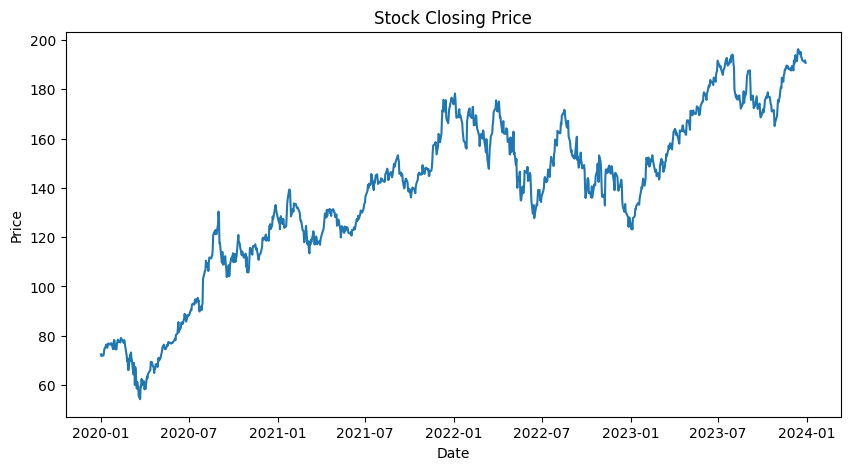

In [8]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)
forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,predicted_mean
1006,190.720926
1007,190.717489
1008,190.731693
1009,190.754043
1010,190.712101
1011,190.712823
1012,190.713249
1013,190.714147
1014,190.715213
1015,190.713495
